This code is for M_SD_20 (Matrix seed dispersal 10x10)

In [1]:
#Libraries needed
import igraph as ig
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [2]:
########## Program #########
dir = os.getcwd()  # Folder where the program is
Experiment = 'M_SD_20' #Name of the experiment
beta = 0.01 # Values of beta, in this case 0.01 as this value as forced
Normalized = 0.75 #Value to normalize the matrix

In [3]:
MGL = [] #Matrix from the databases, narmalized
MCL = [] # Matrix from the databases, normalized and put in the form of (6) matrix from the paper 
VL = [] # Vector with the number of vertex of each web
D1 = [] # Vector with the dimension 1 of each web
D2 = [] # Equal to D1 but with dimension 2
databases = [] # Vector with the name of the databases to be used
MatrixGraphs = [] # Vector with graph matrix 
D1 = [] # Vector with dimension 1
D2 =[] # Vector with dimension 2
VL= [] # Vector with number of vertex

In [4]:
databases_dir = '/databases/M_SD_W' # Directory of the databases

In [5]:
files = os.listdir(dir + databases_dir)

In [6]:
#First way, it writes as ['item',..]
f = open('filedata.txt', 'w') # .txt where put the list with the names of the databases
f.write(str(files)) # Write the list
f.close() # Close the file

In [7]:
#Second way, it writes as a list (as in original program)
#with open ('filedata.txt', 'w') as f:
#    for item in files:
#        f.write("%s\n" % item)
#    f.close()

In [8]:
#This is just for programing erase after done
#files = ['MSD003']

In [9]:
# This rutine allows to read the csv and put into a mtrix
#for db in files: 
#    with open (dir + databases_dir + '/' + db, newline = '') as File:
#        dataimp = csv.reader(File)
#        data = []
#        for row in dataimp:
#            data.append(row)

In [10]:
# This rutine allows to read the csv and put into a matrix using pandas
for db in files: 
    data = pd.read_csv(dir + databases_dir + '/' + db, header = None) # Row data
    rows = data.shape[0] # Size of the first set of species
    cols = data.shape[1] # Size of the second set of species
    dim1 = rows
    dim2 = cols
    if (dim1>9 and dim2>9):
        dim1 = 10
        filas = 10
        dim2 = 10
        cols = 10
        vertexs = dim1 + dim2
        databases.append(db) #Inclusion of the databases in a list to know which databases are being used
        # Normalizing and creation of the graph matrix
        zero_data = np.zeros(shape=(len(data),len(data)))
        zero_data = np.zeros(shape=(vertexs,vertexs))
        MatrixGraphP = pd.DataFrame(zero_data)
        #Create the matrix
        # Part of the cooperation
        for i in range(dim1):
            for j in range(dim1, vertexs):
                MatrixGraphP.loc[i,j] = data.loc[i,j-dim1] #This part is what is in the database 
                MatrixGraphP.loc[j,i] = data.loc[i,j-dim1] #This part is what is in the database
        
        sumatory = [] #To calulte the sum of the rows
        for index, row in MatrixGraphP.iterrows():
            sumatory.append(row.sum())
        Maxi = max(sumatory)
        MatrixGraphP = Normalized*MatrixGraphP/Maxi
        # Part of the competition
        for i in range(dim1):
            for j in range(dim1):
                MatrixGraphP.loc[i,j] = beta
                MatrixGraphP.loc[i+dim1,j+dim1] = beta
        #Diagonal
        for i in range(vertexs):
                MatrixGraphP.loc[i,i] = 0
    
        #Gathering all the data
        MatrixGraphs.append(MatrixGraphP)
        D1.append(dim1)
        D2.append(dim2)
        VL.append(vertexs)
    
        

In [11]:
dim1

31

In [12]:
 MatrixGraphs[0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.195918,0.029082,0.097959,0.016837,0.001531,0.045918,0.143878,0.032143,0.105612,0.036735
1,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.168367,0.053571,0.035204,0.029082,0.000000,0.059694,0.016837,0.050510,0.001531,0.093367
2,0.010000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.107143,0.003061,0.004592,0.000000,0.290816,0.125510,0.022959,0.000000,0.000000,0.000000
3,0.010000,0.010000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.082653,0.030612,0.056633,0.036735,0.004592,0.000000,0.038265,0.032143,0.033673,0.027551
4,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.045918,0.042857,0.012245,0.079592,0.000000,0.004592,0.001531,0.013776,0.009184,0.003061
5,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.041327,0.055102,0.013776,0.044388,0.000000,0.006122,0.000000,0.009184,0.004592,0.018367
6,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.010000,0.010000,0.094898,0.024490,0.012245,0.013776,0.000000,0.018367,0.000000,0.001531,0.003061,0.003061
7,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.010000,0.006122,0.001531,0.010714,0.012245,0.000000,0.000000,0.000000,0.022959,0.007653,0.018367
8,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.007653,0.041327,0.003061,0.070408,0.000000,0.000000,0.000000,0.010714,0.000000,0.003061
9,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.000000,0.102551,0.000000,0.033673,0.000000,0.000000,0.000000,0.000000,0.000000,0.006122


In [13]:
for matrix in MatrixGraphs:
    MGL.append(matrix.copy())


In [14]:
# Montecarlo matrix
for matrix in MGL:
    MCL.append(matrix.copy())

for matrix in range(len(MCL)):
    # Gamma value are negatives
    for i in range(D1[matrix], VL[matrix]):
        for j in range(D1[matrix]):
            MCL[matrix].loc[i,j] = - MCL[matrix].loc[i,j]
            MCL[matrix].loc[j,i] = - MCL[matrix].loc[j,i]
    #Diagonal equal to 1
    for i in range( VL[matrix]):
        MCL[matrix].loc[i,i] = 1

In [15]:
MCL[0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,-0.195918,-0.029082,-0.097959,-0.016837,-0.001531,-0.045918,-0.143878,-0.032143,-0.105612,-0.036735
1,0.010000,1.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,-0.168367,-0.053571,-0.035204,-0.029082,-0.000000,-0.059694,-0.016837,-0.050510,-0.001531,-0.093367
2,0.010000,0.010000,1.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,-0.107143,-0.003061,-0.004592,-0.000000,-0.290816,-0.125510,-0.022959,-0.000000,-0.000000,-0.000000
3,0.010000,0.010000,0.010000,1.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,-0.082653,-0.030612,-0.056633,-0.036735,-0.004592,-0.000000,-0.038265,-0.032143,-0.033673,-0.027551
4,0.010000,0.010000,0.010000,0.010000,1.000000,0.010000,0.010000,0.010000,0.010000,0.010000,-0.045918,-0.042857,-0.012245,-0.079592,-0.000000,-0.004592,-0.001531,-0.013776,-0.009184,-0.003061
5,0.010000,0.010000,0.010000,0.010000,0.010000,1.000000,0.010000,0.010000,0.010000,0.010000,-0.041327,-0.055102,-0.013776,-0.044388,-0.000000,-0.006122,-0.000000,-0.009184,-0.004592,-0.018367
6,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,1.000000,0.010000,0.010000,0.010000,-0.094898,-0.024490,-0.012245,-0.013776,-0.000000,-0.018367,-0.000000,-0.001531,-0.003061,-0.003061
7,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,1.000000,0.010000,0.010000,-0.006122,-0.001531,-0.010714,-0.012245,-0.000000,-0.000000,-0.000000,-0.022959,-0.007653,-0.018367
8,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,1.000000,0.010000,-0.007653,-0.041327,-0.003061,-0.070408,-0.000000,-0.000000,-0.000000,-0.010714,-0.000000,-0.003061
9,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,1.000000,-0.000000,-0.102551,-0.000000,-0.033673,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.006122


In [16]:
Matrix = MCL[0]

In [18]:
# Generating the matrix to use in CgrilliJR
for i in range(0,len(MCL)): 
    textfile = open("databases_"+Experiment+"_flat/"+databases[i]+"_In.lst", "w")
    Matrix = MCL[i].values.flatten()
    for element in Matrix:
        textfile.write(str(element) + "\n")
    textfile.close()

In [19]:
# Calling the program to calculate the structural stability
os.remove("Out_"+Experiment+".txt") if os.path.exists("Out_"+Experiment+".txt") else False
for i in range(0,len(databases)):
    matrix = open("databases_"+Experiment+"_flat/"+databases[i]+"_In.lst", "r")
    # subprocess.run(["./StructuralStab", str(VL[i]), "databases_flat/"+databases[i]+"_In.lst", databases[i]+"_Out.txt", "-1"], capture_output=False)
    subprocess.run(["./StructuralStab", str(VL[i]), "databases_"+Experiment+"_flat/"+databases[i]+"_In.lst", "Out_"+Experiment+".txt", "-1"], capture_output=False)

0.421566
0.295944
0.247685
0.192282
0.177886
0.159395
0.149019
0.154983
0.159096
0.153287
0.143650
0.139997
0.130463
0.127067
0.117750
0.116118
0.111724
0.106460
0.102886
0.101698
0.097192
0.096166
0.099294
0.097476
0.095251
0.093495
0.091318
0.090071
0.088427
0.087100
0.085315
0.083588
0.094813
0.093183
0.091773
0.090432
0.089219
0.087520
0.086006
0.083428
0.082513
0.081382
0.079987
0.078945
0.078206
0.076876
0.075901
0.075296
0.074439
0.073721
0.072543
0.071849
0.071051
0.070416
0.069920
0.070011
0.069541
0.068326
0.067731
0.067497
0.066853
0.066017
0.065546
0.064456
0.063108
0.062494
0.061939
0.061412
0.060872
0.060349
0.059664
0.059033
0.069829
0.069226
0.068676
0.068130
0.067575
0.067053
0.066708
0.066037
0.065280
0.064419
0.063808
0.063221
0.062681
0.062067
0.061782
0.061481
0.061036
0.060514
0.069500
0.068725
0.068155
0.067700
0.067298
0.066942
0.066579
0.066228
0.066026
0.066409
0.066159
0.066759
0.066294
0.065940
0.065189
0.064610
0.064317
0.064848
0.064195
0.063924
0.063564
0

reactitivty eval = 0.624404reactitivty eval = 0.703337

0.014070
0.014062
0.014057
0.014050
0.014043
0.014035
0.014029
0.014020
0.014009
0.014004
0.013996
0.013989
0.013983
0.013979
0.013973
0.013964
0.013956
0.013948
0.013939
0.013934
0.013928
0.013918
0.013912
0.013903
0.013893
0.013884
0.013875
0.013868
0.013860
0.013855
0.013846
0.013840
0.013831
0.013825
0.013818
0.013808
0.013800
0.013791
0.013784
0.013775
0.013771
0.013761
0.013754
0.013746
0.013738
0.013730
0.013723
0.013718
0.013711
0.013707
0.013700
0.013694
0.013687
0.013680
0.013669
0.013663
0.013655
0.013657
0.013647
0.013643
0.013636
0.013629
0.013622
0.013617
0.013607
0.013600
0.013594
0.013588
0.013581
0.013575
0.013568
0.013560
0.013554
0.013544
0.013535
0.013530
0.013523
0.013515
0.013504
0.013496
0.013486
0.013481
0.013476
0.013471
0.013464
0.013455
0.013447
0.013440
0.013436
0.013431
0.013426
0.013420
0.013412
0.013404
0.013399
0.013392
0.013387
0.013380
0.013375
0.013370
0.013363
0.013356
0.013350
0.013341
0.013333
0.013325
0.013315
0.013308
0.013301
0.013298
0.013289
0

reactitivty eval = 0.680095reactitivty eval = 0.703754

0.018865
0.018833
0.018810
0.018786
0.018758
0.018736
0.018710
0.018679
0.018647
0.018617
0.018616
0.018599
0.018566
0.018536
0.018524
0.018507
0.018491
0.018457
0.018426
0.018403
0.018389
0.018374
0.018336
0.018305
0.018291
0.018261
0.018233
0.018208
0.018185
0.018164
0.018136
0.018109
0.018086
0.018057
0.018051
0.018021
0.018000
0.017980
0.017957
0.017939
0.017914
0.017897
0.017869
0.017846
0.017818
0.017798
0.017774
0.017764
0.017749
0.017733
0.017712
0.017691
0.017709
0.017693
0.017673
0.017659
0.017637
0.017614
0.017588
0.017561
0.017545
0.017526
0.017508
0.017489
0.017472
0.017444
0.017419
0.017770
0.017754
0.017729
0.017706
0.017688
0.017672
0.017646
0.017641
0.017625
0.017601
0.017580
0.017560
0.017553
0.017526
0.017507
0.017489
0.017467
0.017446
0.017492
0.017460
0.017446
0.017446
0.017426
0.017413
0.017398
0.017372
0.017355
0.017331
0.017346
0.017322
0.017301
0.017282
0.017264
0.017244
0.017228
0.017211
0.017199
0.017181
0.017164
0.017153
0.017135
0.017121
0.017096
0.017082
0

0.013076
0.013075
0.013073
0.013071
0.013069
0.013067
0.013064
0.013062
0.013060
0.013059
0.013054
0.013052
0.013049
0.013047
0.013044
0.013042
0.013040
0.013039
0.013038
0.013037
0.013035
0.013033
0.013031
0.013028
0.013026
0.013022
0.013020
0.013018
0.013017
0.013013
0.013011
0.013009
0.013009
0.013006
0.013004
0.013001
0.012999
0.012997
0.012995
0.012993
0.012991
0.012990
0.012986
0.012985
0.012982
0.012978
0.012975
0.012974
0.012971
0.012968
0.012966
0.012962
0.012960
0.012958
0.012956
0.012954
0.012953
0.012950
0.012949
0.012945
0.012942
0.012939
0.012936
0.012932
0.012930
0.012926
0.012923
0.012919
0.012917
0.012915
0.012911
0.012909
0.012907
0.012905
0.012903
0.012902
0.012899
0.012897
0.012895
0.012893
0.012891
0.012887
0.012884
0.012880
0.012877
0.012875
0.012872
0.012870
0.012868
0.012866
0.012864
0.012862
0.012860
0.012857
0.012854
0.012853
0.012852
0.012850
0.012847
0.012844
0.012842
0.012841
0.012840
0.012838
0.012835
0.012831
0.012829
0.012828
0.012824
0.012822
0.012820
0

0.011524
0.011523
0.011523
0.011522
0.011521
0.011521
0.011519
0.011519
0.011517
0.011516
0.011515
0.011514
0.011514
0.011513
0.011512
0.011511
0.011510
0.011509
0.011508
0.011507
0.011506
0.011504
0.011504
0.011503
0.011502
0.011501
0.011501
0.011499
0.011498
0.011497
0.011497
0.011496
0.011495
0.011495
0.011494
0.011492
0.011499
0.011498
0.011498
0.011497
0.011495
0.011495
0.011494
0.011493
0.011492
0.011491
0.011490
0.011489
0.011488
0.011487
0.011486
0.011485
0.011484
0.011484
0.011483
0.011482
0.011482
0.011481
0.011480
0.011479
0.011478
0.011477
0.011476
0.011475
0.011474
0.011472
0.011472
0.011471
0.011470
0.011469
0.011468
0.011467
0.011466
0.011466
0.011464
0.011463
0.011462
0.011461
0.011460
0.011459
0.011458
0.011457
0.011457
0.011455
0.011454
0.011454
0.011453
0.011452
0.011451
0.011450
0.011449
0.011448
0.011447
0.011446
0.011445
0.011444
0.011444
0.011443
0.011442
0.011441
0.011440
0.011440
0.011439
0.011438
0.011437
0.011436
0.011436
0.011435
0.011434
0.011434
0.011432
0

reactitivty eval = 0.600576reactitivty eval = 0.663189

0.022677
0.022641
0.022626
0.022605
0.022696
0.022667
0.022624
0.022597
0.022560
0.022535
0.022508
0.022482
0.022456
0.022431
0.022407
0.022374
0.022354
0.022333
0.022312
0.022282
0.022266
0.022244
0.022218
0.022188
0.022157
0.022140
0.022108
0.022076
0.022058
0.022029
0.022007
0.021984
0.021955
0.021913
0.021899
0.021875
0.021862
0.021841
0.021817
0.021790
0.021761
0.021738
0.021704
0.021669
0.021635
0.021617
0.021585
0.021564
0.021534
0.021514
0.021484
0.021467
0.021446
0.021423
0.021455
0.021427
0.021405
0.021374
0.021348
0.021315
0.021293
0.021264
0.021244
0.021227
0.021205
0.021170
0.021152
0.021115
0.021100
0.021080
0.021060
0.021032
0.021010
0.020984
0.020970
0.020948
0.020918
0.020899
0.020869
0.020850
0.020831
0.020807
0.020784
0.020764
0.020741
0.020736
0.020717
0.020694
0.020670
0.020636
0.020617
0.020594
0.020577
0.020546
0.020531
0.020500
0.020488
0.020471
0.020450
0.020419
0.020390
0.020373
0.020350
0.020319
0.020294
0.020271
0.020254
0.020235
0.020218
0.020204
0.020196
0

reactitivty eval = 0.672129

0.014293
0.014288
0.014284
0.014281
0.014278
0.014274
0.014272
0.014269
0.014265
0.014263
0.014260
0.014257
0.014254
0.014250
0.014247
0.014245
0.014241
0.014240
0.014238
0.014235
0.014239
0.014238
0.014235
0.014233
0.014232
0.014229
0.014223
0.014221
0.014218
0.014216
0.014213
0.014211
0.014206
0.014203
0.014200
0.014195
0.014194
0.014190
0.014185
0.014182
0.014794
0.014789
0.014786
0.014782
0.014802
0.014798
0.014794
0.014789
0.014785
0.014784
0.014782
0.014780
0.014776
0.014774
0.014770
0.014766
0.014760
0.014756
0.014755
0.014751
0.014747
0.014740
0.014738
0.014735
0.014733
0.014730
0.014729
0.014725
0.014721
0.014719
0.014716
0.014714
0.014712
0.014710
0.014706
0.014706
0.014702
0.014700
0.014697
0.014694
0.014702
0.014699
0.014697
0.014694
0.014692
0.014689
0.014727
0.014725
0.014721
0.014718
0.014713
0.014709
0.014707
0.014705
0.014702
0.014699
0.014698
0.014695
0.014693
0.014691
0.014688
0.014682
0.014681
0.014679
0.014677
0.014674
0.014671
0.014669
0.014664
0.014661
0.014658
0

reactitivty eval = 0.593229reactitivty eval = 0.652705

0.013883
0.013876
0.013870
0.013862
0.013856
0.013846
0.013838
0.013833
0.013828
0.013823
0.013819
0.013854
0.013851
0.013843
0.013838
0.013833
0.013830
0.013822
0.013817
0.013812
0.013805
0.013800
0.013793
0.013788
0.013793
0.013788
0.013782
0.013777
0.013771
0.013765
0.013762
0.013755
0.013748
0.013759
0.013751
0.013746
0.013755
0.013745
0.013738
0.013730
0.013725
0.013721
0.013715
0.013708
0.013703
0.013699
0.013696
0.013693
0.013688
0.013681
0.013673
0.013667
0.013664
0.013658
0.013652
0.013648
0.013644
0.013635
0.013629
0.013624
0.013616
0.013610
0.013604
0.013601
0.013598
0.013589
0.013583
0.013581
0.013577
0.013571
0.013564
0.013558
0.013553
0.013554
0.013548
0.013542
0.013535
0.013528
0.013520
0.013516
0.013508
0.013506
0.013502
0.013491
0.013489
0.013489
0.013481
0.013475
0.013471
0.013466
0.013462
0.013458
0.013450
0.013443
0.013438
0.013432
0.013425
0.013417
0.013411
0.013405
0.013397
0.013391
0.013386
0.013379
0.013374
0.013370
0.013366
0.013360
0.013353
0.013347
0.013341
0

0.014691
0.014694
0.014692
0.014689
0.014687
0.014683
0.014682
0.014679
0.014674
0.014671
0.014668
0.014665
0.014664
0.014661
0.014659
0.014656
0.014655
0.014654
0.014653
0.014650
0.014648
0.014646
0.014645
0.014640
0.014639
0.014635
0.014633
0.014631
0.014627
0.014626
0.014623
0.014620
0.014619
0.014616
0.014614
0.014612
0.014609
0.014608
0.014605
0.014603
0.014600
0.014599
0.014596
0.014594
0.014591
0.014588
0.014587
0.014586
0.014584
0.014581
0.014580
0.014577
0.014574
0.014573
0.014572
0.014569
0.014565
0.014563
0.014561
0.014559
0.014557
0.014555
0.014551
0.014547
0.014543
0.014541
0.014538
0.014535
0.014533
0.014527
0.014526
0.014525
0.014523
0.014520
0.014518
0.014515
0.014512
0.014510
0.014509
0.014507
0.014504
0.014502
0.014501
0.014498
0.014497
0.014495
0.014491
0.014490
0.014489
0.014486
0.014484
0.014480
0.014479
0.014477
0.014475
0.014473
0.014471
0.014468
0.014466
0.014463
0.014462
0.014460
0.014457
0.014456
0.014452
0.014450
0.014448
0.014447
0.014443
0.014442
0.014440
0

reactitivty eval = 0.567362

0.011504
0.011502
0.011506
0.011505
0.011504
0.011503
0.011502
0.011502
0.011500
0.011499
0.011498
0.011497
0.011496
0.011495
0.011495
0.011494
0.011494
0.011493
0.011492
0.011492
0.011490
0.011490
0.011489
0.011488
0.011487
0.011486
0.011485
0.011483
0.011482
0.011482
0.011480
0.011479
0.011479
0.011478
0.011477
0.011476
0.011476
0.011476
0.011475
0.011474
0.011472
0.011472
0.011471
0.011470
0.011470
0.011469
0.011468
0.011467
0.011466
0.011466
0.011464
0.011464
0.011462
0.011461
0.011461
0.011460
0.011462
0.011461
0.011460
0.011459
0.011458
0.011458
0.011457
0.011456
0.011456
0.011454
0.011453
0.011452
0.011451
0.011451
0.011450
0.011449
0.011448
0.011447
0.011446
0.011445
0.011444
0.011443
0.011443
0.011442
0.011441
0.011440
0.011439
0.011439
0.011437
0.011436
0.011435
0.011434
0.011434
0.011433
0.011432
0.011432
0.011431
0.011430
0.011429
0.011428
0.011427
0.011426
0.011425
0.011424
0.011424
0.011423
0.011422
0.011422
0.011421
0.011420
0.011419
0.011418
0.011417
0.011417
0.011416
0

In [20]:
matrix

<_io.TextIOWrapper name='databases_M_SD_20_flat/MSD005_In.lst' mode='r' encoding='UTF-8'>

In [21]:
# Reading the result
result = pd.read_csv("Out_"+Experiment+".txt",sep = " ", header = None)

In [168]:
List_Stab = result.to_numpy().transpose().tolist()

In [169]:
List_Stab[2]

[2.789898e-05,
 1.802998e-06,
 3.259602e-06,
 1.039551e-05,
 14.88014,
 1.364535,
 4.968898,
 3.129824,
 3.687919,
 2.582352,
 1.881933,
 3.879961,
 11.9935,
 5.267572]

In [170]:
# Calculate mean grade and gamma minus beta
##Mean Grade
meangrade = []
for matrix in MGL:
    matrix_abs = matrix.copy()
    matrix_abs = matrix_abs.abs()
    meangrade_matrix = matrix_abs.sum().sum()/(2*matrix.shape[0])
    meangrade.append(meangrade_matrix)
    
## Gamma minus Beta
gammaminusbeta = []
for matrix in MCL:
    gammaminusbeta_matrix = (-matrix.sum().sum() + matrix.shape[0])/(2*matrix.shape[0])
    gammaminusbeta.append(gammaminusbeta_matrix)
    

In [171]:
meangrade

[0.19729591836734697,
 0.10172516472377091,
 0.15194444444444447,
 0.13610780984719867,
 0.1457142857142857,
 0.13145209580838318,
 0.1162248322147651,
 0.14736486486486486,
 0.18774193548387097,
 0.15977272727272726]

In [172]:
gammaminusbeta

[0.10729591836734693,
 0.01172516472377092,
 0.06194444444444436,
 0.046107809847198665,
 0.055714285714285695,
 0.04145209580838314,
 0.026224832214765036,
 0.057364864864864896,
 0.09774193548387097,
 0.06977272727272724]

In [173]:
# 0.000.. has to be 0 
#for matrix in MGL:
#    for i in range(matrix.shape[0]):
#        for j in range(matrix.shape[0]):
#            if abs(matrix.loc[i,j]) < 1E-4:
#                matrix.loc[i,j] = str(0)

ValueError: x and y must have same first dimension, but have shapes (10,) and (14,)

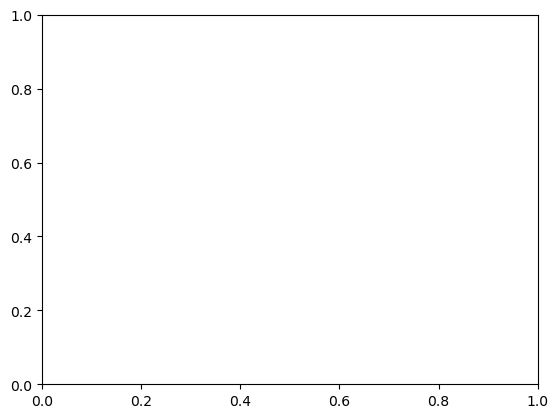

In [174]:
# Generating Plots of meangrade
plt.plot(meangrade, List_Stab[2], "ro")

ValueError: x and y must have same first dimension, but have shapes (10,) and (14,)

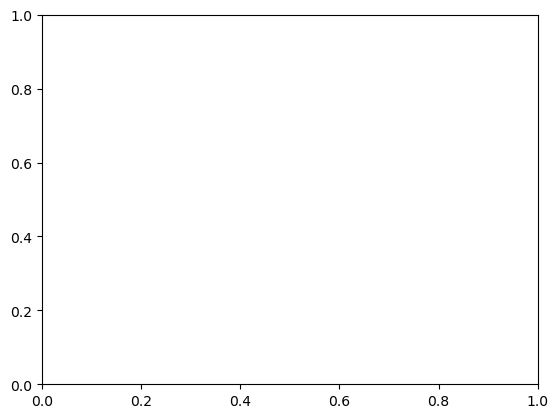

In [175]:
# Generating Plots of gammaminusbeta
plt.plot(gammaminusbeta, List_Stab[2], "ro")

In [148]:
MGL[0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.195918,0.029082,0.097959,0.016837,0.001531,0.045918,0.143878,0.032143,0.105612,0.036735
1,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.168367,0.053571,0.035204,0.029082,0.000000,0.059694,0.016837,0.050510,0.001531,0.093367
2,0.010000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.107143,0.003061,0.004592,0.000000,0.290816,0.125510,0.022959,0.000000,0.000000,0.000000
3,0.010000,0.010000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.082653,0.030612,0.056633,0.036735,0.004592,0.000000,0.038265,0.032143,0.033673,0.027551
4,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.045918,0.042857,0.012245,0.079592,0.000000,0.004592,0.001531,0.013776,0.009184,0.003061
5,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.041327,0.055102,0.013776,0.044388,0.000000,0.006122,0.000000,0.009184,0.004592,0.018367
6,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.010000,0.010000,0.094898,0.024490,0.012245,0.013776,0.000000,0.018367,0.000000,0.001531,0.003061,0.003061
7,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.010000,0.006122,0.001531,0.010714,0.012245,0.000000,0.000000,0.000000,0.022959,0.007653,0.018367
8,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.007653,0.041327,0.003061,0.070408,0.000000,0.000000,0.000000,0.010714,0.000000,0.003061
9,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.000000,0.102551,0.000000,0.033673,0.000000,0.000000,0.000000,0.000000,0.000000,0.006122


In [87]:
Graph = MGL[0].values

In [88]:
g = ig.Graph.Adjacency((Graph>0).tolist(), mode = 'undirected')

In [89]:
ig.summary(g)

IGRAPH U--- 20 165 -- 


In [90]:
communities = g.community_edge_betweenness()

In [91]:
communities = communities.as_clustering()

In [72]:
g.modularity(communities)

0.22580645161290325

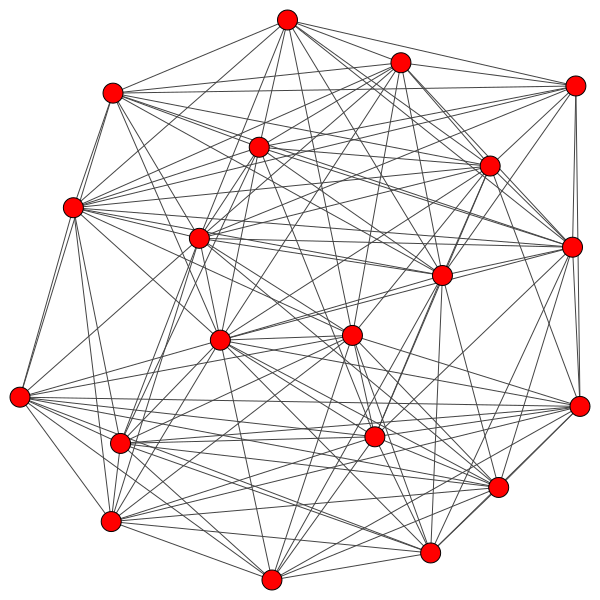

In [73]:
layout = g.layout()
ig.plot(g, layout=layout)

In [74]:
g.get_edgelist()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 11),
 (1, 12),
 (1, 15),
 (1, 17),
 (1, 18),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 13),
 (2, 14),
 (2, 15),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 11),
 (3, 12),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 13),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 13),
 (5, 15),
 (5, 19),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 11),
 (6, 12),
 (6, 14),
 (7, 8),
 (7, 9),
 (7, 10),
 (7, 13),
 (8, 9),
 (8, 11),
 (8, 12),
 (8, 16),
 (9, 10),
 (10, 11),
 (10, 12),
 (10, 13),
 (10, 14),
 (10, 15),
 (10, 16),
 (10, 17),
 (10, 18),
 (10, 19),
 (11, 12),
 (11, 13),
 (11, 14),
 (11, 15),
 (11, 16),
 (11, 17),
 (11, 18),
 (11, 19),
 (12, 13),
 (12, 14),
 (12, 15),
 (12, 16),
 (12, 17),
 (12, 18),
 (

In [75]:
g.degree(mode = "in")

[17,
 14,
 13,
 11,
 12,
 12,
 12,
 11,
 12,
 10,
 14,
 15,
 14,
 14,
 12,
 13,
 11,
 11,
 10,
 10]

In [76]:
g.degree()

[17,
 14,
 13,
 11,
 12,
 12,
 12,
 11,
 12,
 10,
 14,
 15,
 14,
 14,
 12,
 13,
 11,
 11,
 10,
 10]

In [77]:
# Modularity review
Modul = []
for i in range(0,len(MGL)):
    Graph = MGL[i].values
    g = ig.Graph.Adjacency((Graph>0).tolist(), mode = 'undirected')
    communities = g.community_edge_betweenness()
    communities = communities.as_clustering()
    modula = g.modularity(communities)
    Modul.append(modula)

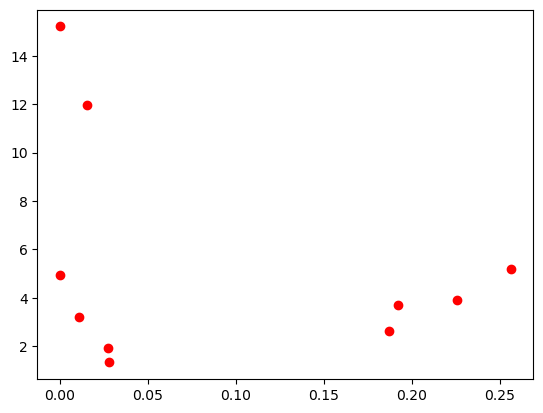

In [78]:
# Generating plots modularity
plt.plot(Modul, List_Stab[2], "ro")

In [79]:
# Modularity review
Modul = []
for i in range(0,len(MGL)):
    Graph = MGL[i].values
    g = ig.Graph.Adjacency((Graph>0).tolist(), mode = 'undirected')
    communities = g.community_multilevel().membership
    modula = g.modularity(communities)
    Modul.append(modula)

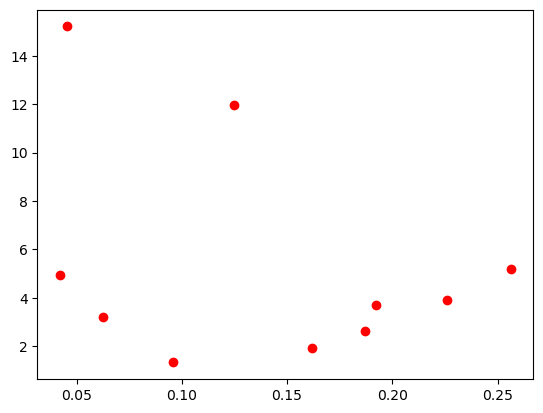

In [83]:
# Generating plots modularity
plt.plot(Modul, List_Stab[2], "ro")